In [28]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Data Collection

In [6]:
#reading data
data=pd.read_csv("data set/aero/train_FD001.txt", sep=" ", header=None)
data.head()
data.shape

(20631, 28)

### Preprocessing

In [7]:
# columns list
COLS = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]

#labeling columns name on data 
data = data[[f for f in range(0, 26)]]
data.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]

data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
# maximun number of engines cycle
max_cycles_df = data.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df

,ID,MaxCycleID
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [14]:
# Calculating RUL form the max_cycles_df
data = pd.merge(data, max_cycles_df, how="inner", on="ID")
data["RUL"] = data["MaxCycleID"] - data["Cycle"]
data.drop('MaxCycleID',inplace=True, axis=1)
data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,binary_RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,1
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,1
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,1
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,1
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,1


In [19]:
#coverting into binary Rul 
# 1 for okay
# 0 for not Okay
binary_RUL=data['RUL'].map(lambda x: 1 if x>=20 else 0)
data['binary_RUL']=binary_RUL
pro01_data=data

### Analysing Data & feature selection


/home/alpha/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


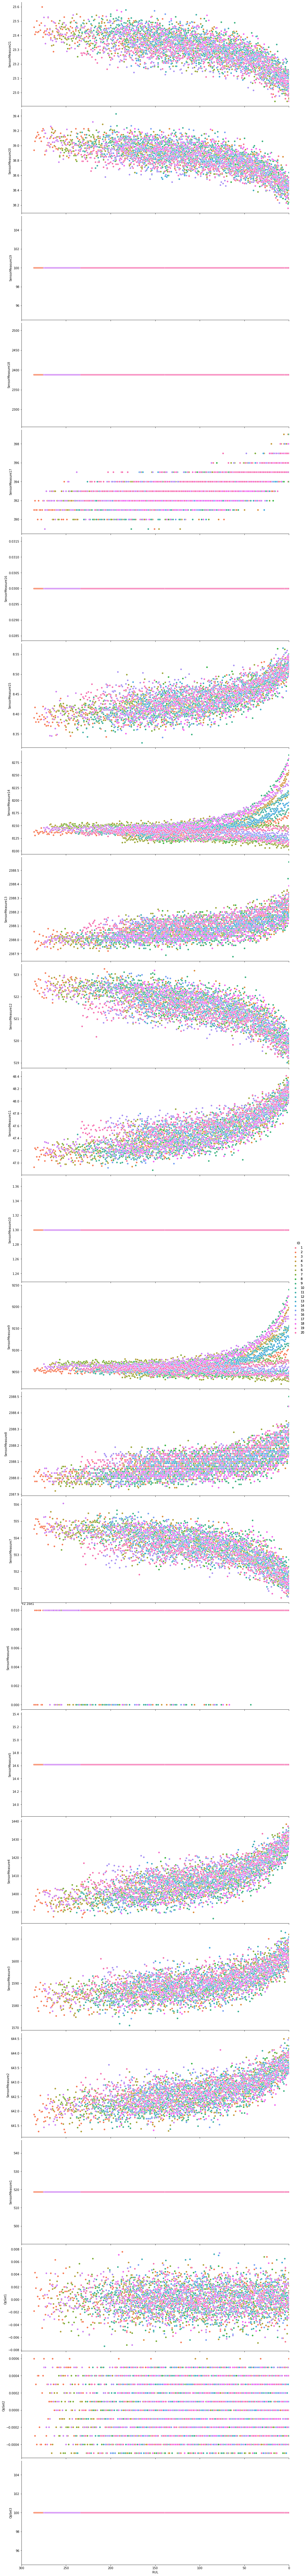

In [20]:
#showing relation with each featues and RUL

sns.pairplot(pro01_data[pro01_data['ID']<=20],hue='ID'
             ,x_vars='RUL'
             , y_vars=['SensorMeasure21','SensorMeasure20','SensorMeasure19',
                       'SensorMeasure18','SensorMeasure17','SensorMeasure16',
                       'SensorMeasure15','SensorMeasure14','SensorMeasure13',
                       'SensorMeasure12','SensorMeasure11','SensorMeasure10',
                       'SensorMeasure9','SensorMeasure8','SensorMeasure7',
                       'SensorMeasure6','SensorMeasure5','SensorMeasure4',
                       'SensorMeasure3','SensorMeasure2','SensorMeasure1',
                       'OpSet1','OpSet2','OpSet3']
             ,kind='scatter', diag_kind='auto', markers=None,size=5, aspect=2.5).set(xlim=(300,0)).add_legend()

From the above graphs we can see that opset3 ,SensorMeasure 1,5,6,10,16,18,19 are constant for diffrent RULs.
so these features will not be use full for the training.

In [21]:
pro01_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,binary_RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,1
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,1
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,1
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,1
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,0


In [22]:
#droping opset3 ,SensorMeasure 1,5,6,10,16,18,19
pro02_data=pro01_data.drop(columns=['OpSet3','SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure10','SensorMeasure18','SensorMeasure19'])

In [23]:
# data after removing non usefull features
pro02_data

,ID,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL,binary_RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,191,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,190,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,189,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,188,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735,4,0
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594,3,0
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333,2,0
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640,1,0


### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

X=pro02_data.drop(["ID","Cycle","RUL","binary_RUL"],axis=1)
y=pro02_data['binary_RUL']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

### Feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  

### Model Evaluation

In [68]:
def model(model):
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.values 
    y_test_ = pd.Series(y_test) 
    y_test_ = y_test_.values 
    #print("Comparison:")
    #result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test_.reshape(len(y_test_),1)),1)
    #print(result[1:500])
    
    c_matrix = confusion_matrix(y_test_, y_pred)
    print("Confusion Matrix = \n",c_matrix)
    print("Accuracy Score = ",(accuracy_score(y_test_, y_pred))*100)
    print("Train Score = ",(model.score(X_train, y_train))*100)
    print("Test Score = ",(model.score(X_test, y_test))*100)
    
    
    
    categories = ['Negative','Positive']
    prediction = ['True Negative','False Positive', 'False Negative','True Positive']
    percentage = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]

    labels = [f'{m}\n{n}' for m, n in zip(prediction,percentage)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(c_matrix,cmap = 'Greens' , fmt = '',annot = labels, xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title ("Confusion Matrix")
    

### Training model(LOGISTIC REGRESSION)

Confusion Matrix = 
 [[ 307   68]
 [  68 3684]]
Accuracy Score =  96.70462805912285
Train Score =  96.96437227338826
Test Score =  96.70462805912285


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

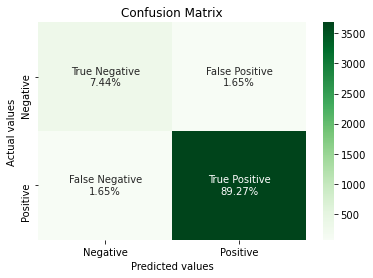

In [69]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)  

model(classifier)

In [73]:
y_pred.shape


(13096,)

Applying model on this data(test_FD001.txt) and predicting the RUL

In [63]:
#reading data
data1=pd.read_csv("data set/aero/test_FD001.txt", sep=" ", header=None)
data1.head()


COLS = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21","nan","nan1"]

#labeling columns name on data 
data = data1[[f for f in range(0, 28)]]
data1.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21","nan","nan1"]
data1.head()

data1=data1.drop(['nan','nan1'],axis=1)

# maximun number of engines cycle
max_cycles_df = data1.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df

data1 = pd.merge(data1, max_cycles_df, how="inner", on="ID")
data1["RUL"] = data1["MaxCycleID"] - data1["Cycle"]
data1.drop('MaxCycleID',inplace=True, axis=1)
data1.head()

#coverting into binary Rul 
# 1 for okay
# 0 for not Okay
binary_RUL=data1['RUL'].map(lambda x: 1 if x>=20 else 0)
data1['binary_RUL']=binary_RUL
testing1_data=data1

#creating x and y test
y_test=testing1_data['binary_RUL']
y_test

x_test=testing1_data.drop(columns=['OpSet3','SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure10','SensorMeasure18','SensorMeasure19',"ID","Cycle","RUL","binary_RUL"],axis=1)

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
correct_per=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))*100

print("correct percentage = "+ str( correct_per) + "%")
testing1_data['log_pred_RUL']=y_pred

testing1_data

[[   98  1902]
 [    2 11094]]
correct percentage = 85.46120952962737%


,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,binary_RUL,log_pred_RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,30,1,1
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,29,1,1
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,28,1,1
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,27,1,1
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,26,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,4,0,1
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,3,0,1
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,2,0,1
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,1,0,1


0.8546120952962737